# Supplemental Figure S15: Impact of neighboring sequences on mismatches

# Setup

## imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from dms_3d_features.plotting import *

## extra functions

In [ ]:
def assign_stack_type(row):
    if row["both_pyrimidine"]:
        return "both_pyrimidine"
    elif row["both_purine"]:
        return "both_purine"
    else:
        return "mixed"


def plot_stack_type(df, pair, ax):
    df_pair = df.query(
        f"r_nuc == '{pair[0]}' and r_type == 'NON-WC' and likely_pair == '{pair}'"
    ).copy()
    df_pair["stack_type"] = df_pair.apply(assign_stack_type, axis=1)
    ax = plot_violins_w_percent(
        df_pair,
        "ln_r_data",
        "stack_type",
        cutoff=-5.45,
        color=None,
        gt_lt="less",
        xlim=(-10, -1),
        sorted_by_mean=True,
        ax=ax,
    )
    color_map = {
        "both_purine": "tab:blue",
        "mixed": "tab:orange",
        "both_pyrimidine": "tab:green",
    }

    # Update the colors based on the x-tick labels
    for violin, label in zip(ax.collections, ax.get_yticklabels()):
        stack_type = label.get_text()
        if stack_type in color_map:
            violin.set_facecolor(color_map[stack_type])

    ax.set_ylabel("Stack type", labelpad=2)
    ax.set_xlabel("ln(Mutation Fraction)", labelpad=2)
    ax.set_yticklabels(["purine", "mixed", "pyrim."])
    ax.set_xticks([-10, -8, -6, -4, -2])
    publication_style_ax(ax)
    return ax

## load data

In [3]:
DATA_PATH = "../../data"
REVISION_PATH = "../../data/revisions"

In [4]:
df_res = pd.read_json(f"{DATA_PATH}/raw-jsons/residues/pdb_library_1_residues.json")
df_res = df_res.query("r_data_outlier == False").copy()

# Plotting

/Users/jyesselman2/Library/CloudStorage/Dropbox/4_papers/2024_dms_quant_framework/dms_3d_features/plotting.py:444: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.violinplot(
/var/folders/lg/b_1r07zd7174kpbyfysdr7p0dxd870/T/ipykernel_87669/2512602312.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["purine", "mixed", "pyrim."])
/Users/jyesselman2/Library/CloudStorage/Dropbox/4_papers/2024_dms_quant_framework/dms_3d_features/plotting.py:444: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.violinplot(
/var/folders/lg/b_1r07zd7174kpbyfysdr7p0dxd870/T/ipykernel_87669/2512602312.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["purine", "mixed", "pyrim."])
/Users/jyesselman2/Library/CloudStorage/Dropbox/4_papers/2024_dms_quant_framework/dms_3d_features/plotting.py:444: UserWarni

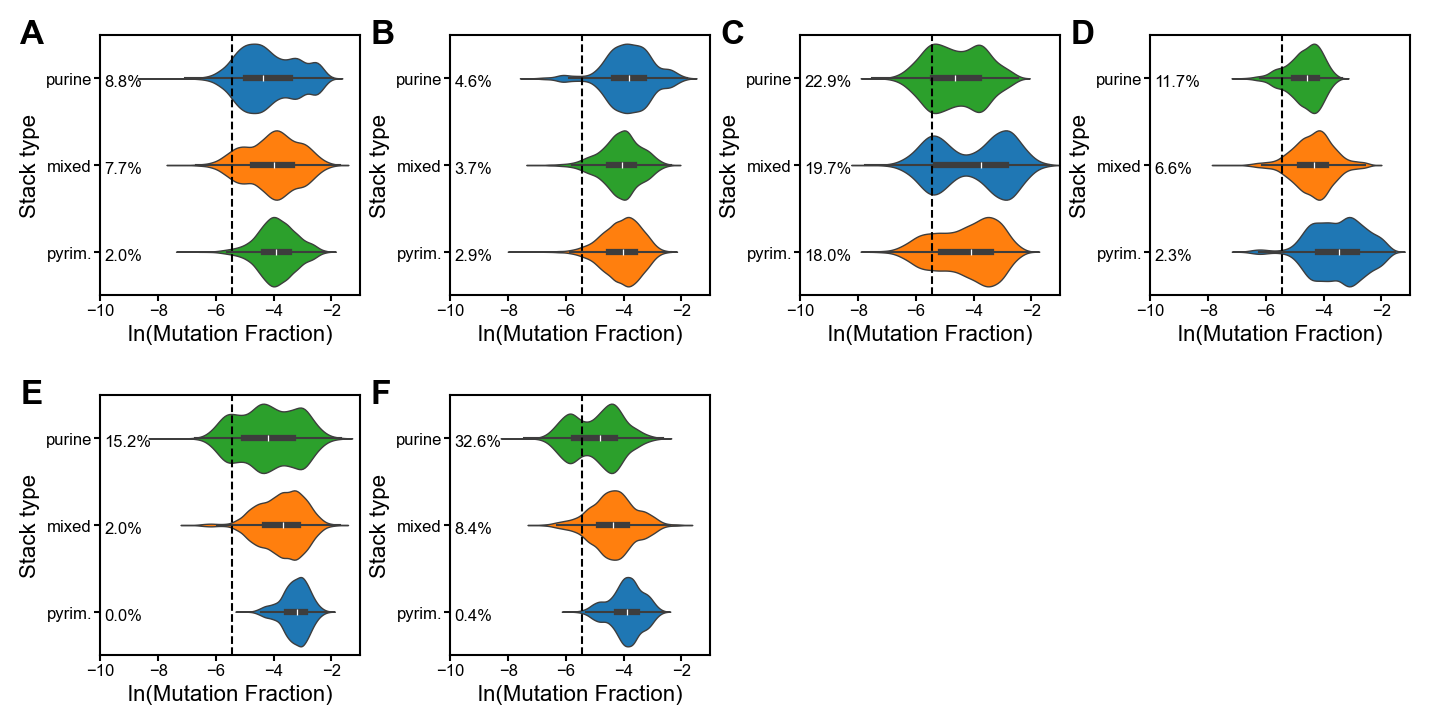

In [5]:
fig_size = (7, 4)
layout = (2, 4)
subplot_size = (1.3, 1.3)  # Each subplot is 4" x 3"
spacing = {
    "hspace": 0.45,  # horizontal spacing in inches
    "wspace": 0.50,  # vertical spacing in inches
    "margins": {"left": 0.40, "right": 0.0, "top": 0.0, "bottom": 0.50},
}

coords_list = calculate_subplot_coordinates(fig_size, layout, subplot_size, spacing)
fig = plt.figure(figsize=fig_size, dpi=200)
pairs = ["AA", "AC", "AG", "CA", "CC", "CU"]
for i, pair in enumerate(pairs):
    ax = fig.add_axes(coords_list[i])
    plot_stack_type(df_res, pair, ax)
add_subplot_labels(fig, coords_list[0:6])
fig.savefig(
    "../../figures/supplemental_figures/supplemental_figure_s15.png",
    dpi=600,
    bbox_inches="tight",
)